In [1]:
from GraphManager import GraphManager
from firebase_admin import credentials
import as_graph

# Location of Firebase credentials
# noinspection SpellCheckingInspection
credentials_loc = "/home/duncan/.secret/invisible-map-firebase-adminsdk-s924m-de6e08b695.json"

# Configuration

# 0: sensible_default_weights
# 1: trust_odom
# 2: trust_tags
# 3: new_option
optimization_weight = 0

# 0: Sparse bundle adjustment
# 1: Tag prescaling uses the full covariance matrix
# 2: Tag prescaling uses only the covariance matrix diagonal
# 3: Tag prescaling is a matrix of ones
prescaling_opt = 0

# If true, then download and cache the unprocessed maps from Firebase
refresh_cache = True

# JSON files in the cache that match this pattern are loaded by the GraphManager
map_pattern = "unprocessed_maps/**/*Part 2!*"

# Show plots if true
visualize = True

# Run the comparison routine if true
compare = False

# Set up the graph manager
cred = credentials.Certificate(credentials_loc)
graph_manager = GraphManager(GraphManager.ordered_weights_dict_keys[optimization_weight], cred,
                             pso=as_graph.PrescalingOptEnum.get_by_value(prescaling_opt))
if refresh_cache:
    graph_manager.firebase_listen()

Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/122443012900625-Living Room.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/143465727450583-Living Room.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/14585931835833-new map.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/151996673058833-Avery Room.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/154936739895166-Marion Lower Level.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/17117387138625-first test.json
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/187726154606625-test blocks jackie.json
Successfully cached /home/duncan/occam/invisible-map-gen


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 0.030877597129240677
checking optimized edges
Total chi2: 0.010251727748317537
tag_vertex_shift [[ 0.21298457  0.03785792 -0.06869707 -0.00673554 -0.00585316 -0.00265728
  -0.00712266  0.        ]
 [ 0.24946025  0.04060123 -0.09354915 -0.00297111  0.01823825  0.00746718
   0.00185238  0.        ]
 [ 0.2255851  -0.07608166  0.32885919 -0.02032476 -0.30024799 -0.01269331
   0.01445567  0.        ]
 [ 0.39184134 -0.03019083 -0.11612246 -0.00466845 -0.09700385  0.00653962
   0.09127833  0.        ]
 [-0.04040555  0.02643356 -0.08231886 -0.00794324  0.00668921  0.00149795
   0.00057504  0.        ]]


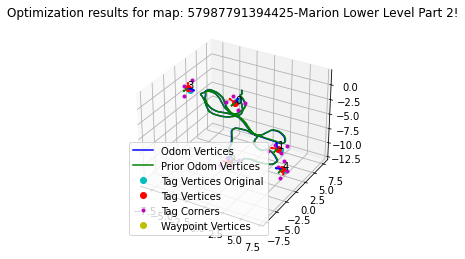

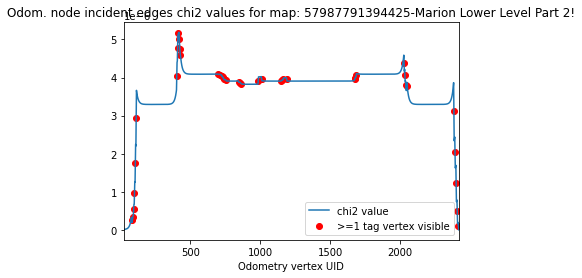

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [2]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=compare)